In [1]:
import sklearn
import pandas as pd

X = pd.read_csv('train.csv')
y = pd.read_csv('test.csv')
submission = pd.read_csv('sampleSubmission.csv')

In [2]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  6493 non-null   object
 1   count     6493 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 101.6+ KB


In [3]:
X.drop(['registered','casual'], axis=1, inplace=True)

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


In [5]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [6]:
print(X['datetime'][100])

2011-01-05 09:00:00


In [7]:
X.shape, y.shape

((10886, 10), (6493, 9))

In [8]:
print(X['datetime'][100].split())
print(X['datetime'][100].split("-"))
print(X['datetime'][100].split()[0])
print(X['datetime'][100].split()[1])

['2011-01-05', '09:00:00']
['2011', '01', '05 09:00:00']
2011-01-05
09:00:00


In [9]:
# Create features 

X['date'] = X['datetime'].apply(lambda x : x.split()[0])

In [10]:
X['year'] = X['datetime'].apply(lambda x : x.split()[0].split('-')[0])
X['month'] = X['datetime'].apply(lambda x : x.split()[0].split('-')[1])
X['day'] = X['datetime'].apply(lambda x : x.split()[0].split('-')[2])
X['hour'] = X['datetime'].apply(lambda x : x.split()[1].split(':')[0])
X['minute'] = X['datetime'].apply(lambda x : x.split()[1].split(':')[1])
X['second'] = X['datetime'].apply(lambda x : x.split()[1].split(':')[2])

In [11]:
from datetime import datetime
import calendar

print(X['date'][100])
print(datetime.strptime(X['date'][100], "%Y-%m-%d"))

print(datetime.strptime(X['date'][100], "%Y-%m-%d").weekday())

print(calendar.day_name[datetime.strptime(X['date'][100],"%Y-%m-%d").weekday()])


2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [12]:
X['weekday'] = X['date'].apply(lambda dateString: calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])

In [13]:
X['season'] = X['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

X['weather'] = X['weather'].map({1: 'Clear', 2: 'Mist, Few clouds',3: 'Light Snow, Rain, Thunderstorm',4: 'Heavy Rain, Thunderstorm, Snow, Fog'})

In [14]:
X.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,1,2011-01-01,2011,01,01,04,00,00,Saturday


/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


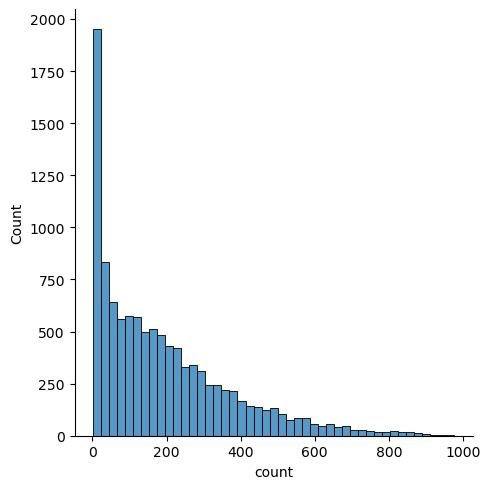

In [15]:
## Visualization

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.displot(X['count'])
mpl.rc('font',size = 15)



/opt/anaconda3/envs/COMS30035_labs/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


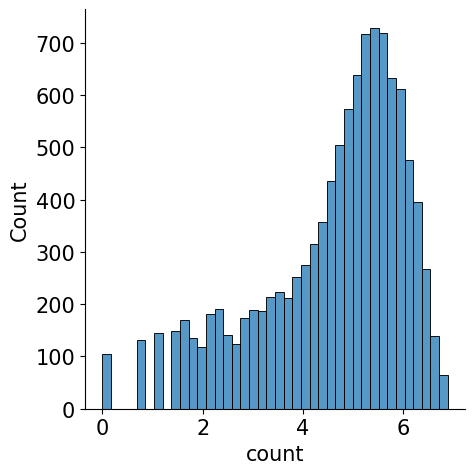

In [16]:
# manipulate to follow normal distribution
# from skewed distribution (Left)

sns.displot(np.log(X['count']))

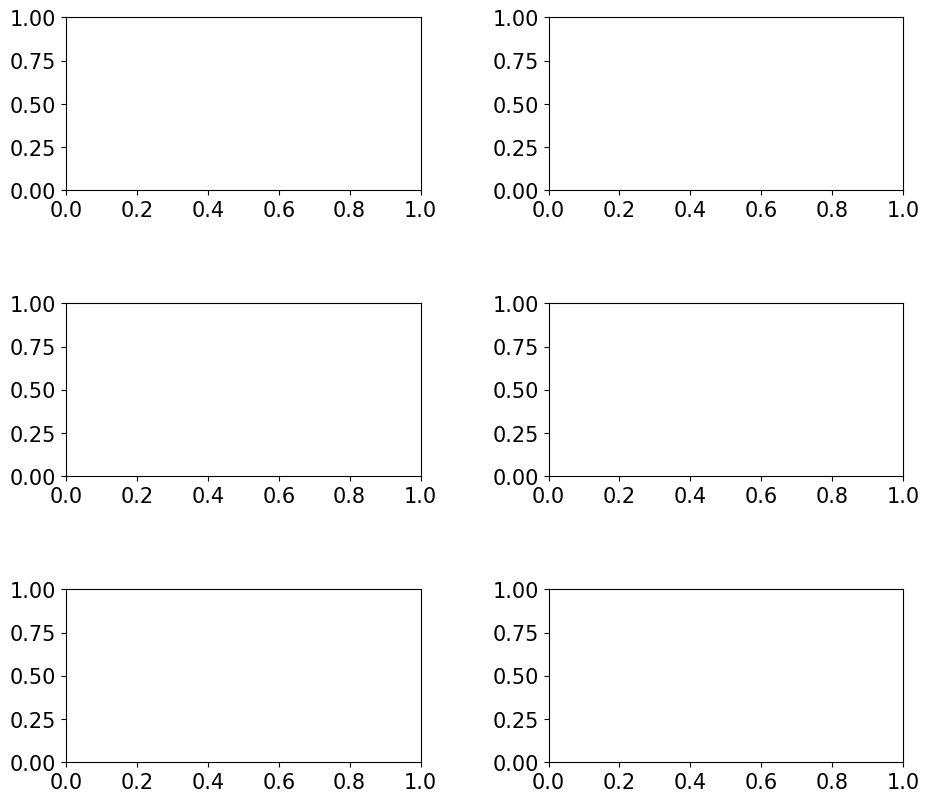

In [23]:
# Plotting in M x n Size Figure

mpl.rc('font', size = 15)
mpl.rc('axes', titlesize = 10)


# The whole sublots are allocated in Var figure , 축 6개 -> Var axes. 
figure, axes = plt.subplots(nrows=3, ncols=2)

plt.tight_layout() # Secure space between each plots

figure.set_size_inches(10,9)





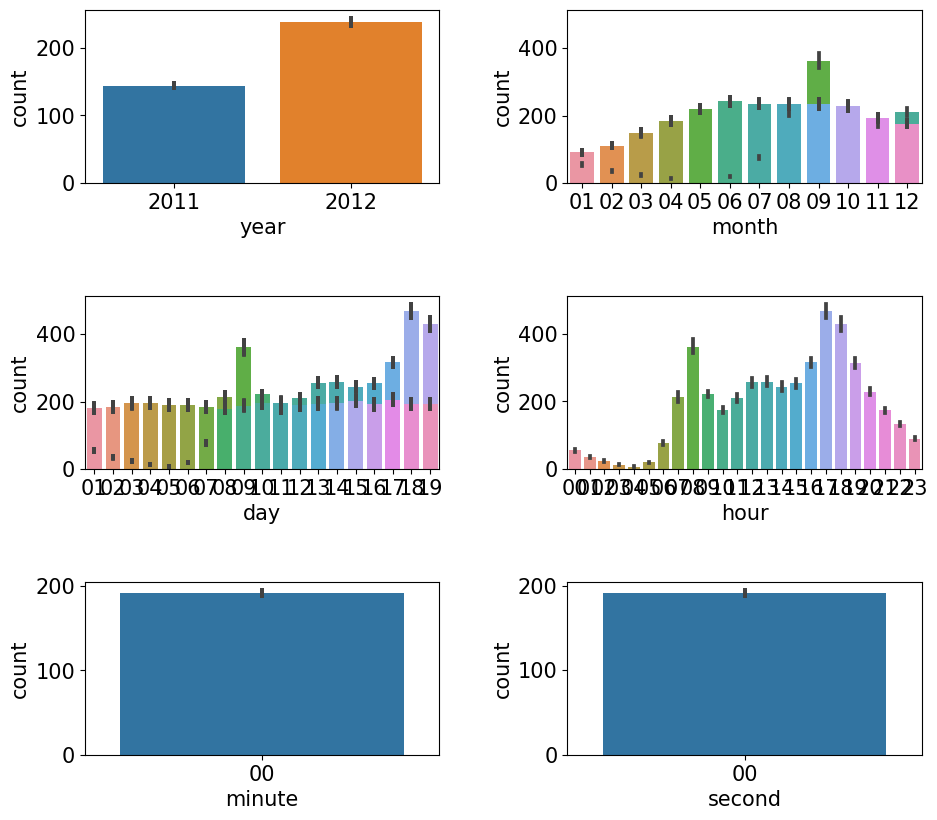

In [37]:
axes

sns.barplot(x='year', y = 'count', data = X, ax=axes[0,0])
sns.barplot(x='month',y='count', data = X, ax = axes[0,1])
sns.barplot(x ='day',y ='count',data= X, ax=axes[1,0])
sns.barplot(x='hour',y ='count', data = X, ax = axes[1,1])
sns.barplot(x='minute',y='count',data= X, ax= axes[2,0])
sns.barplot(x='second',y = 'count',data=X, ax = axes[2,1])

figure




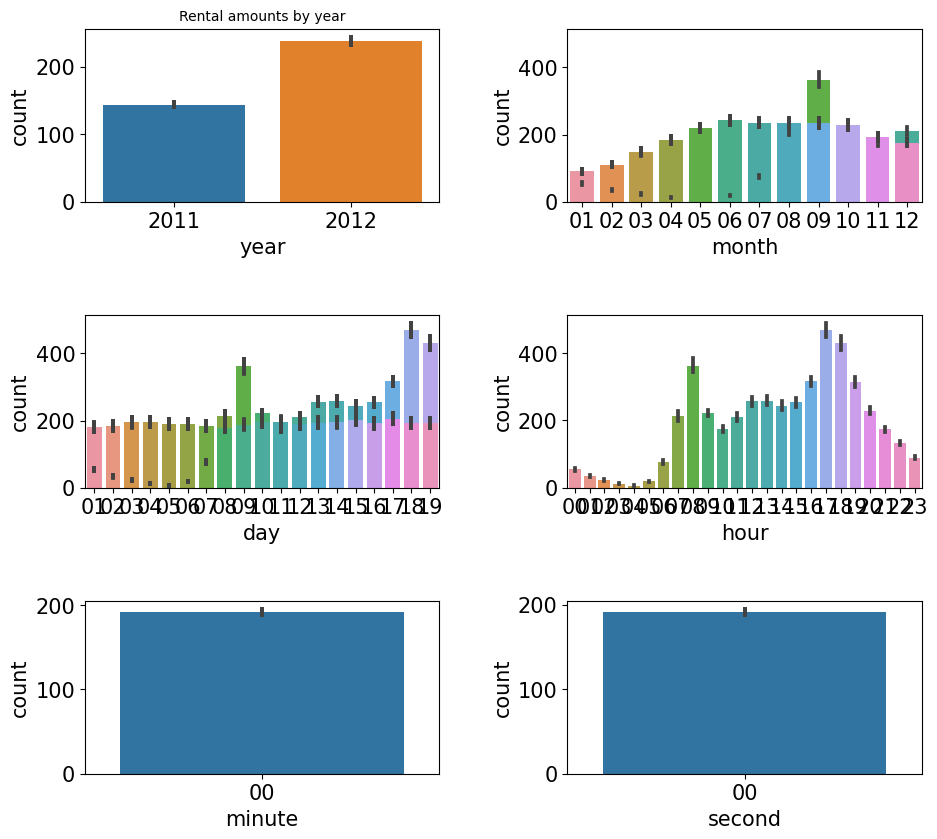

In [39]:
axes[0,0].set(title = 'Rental amounts by year')
figure

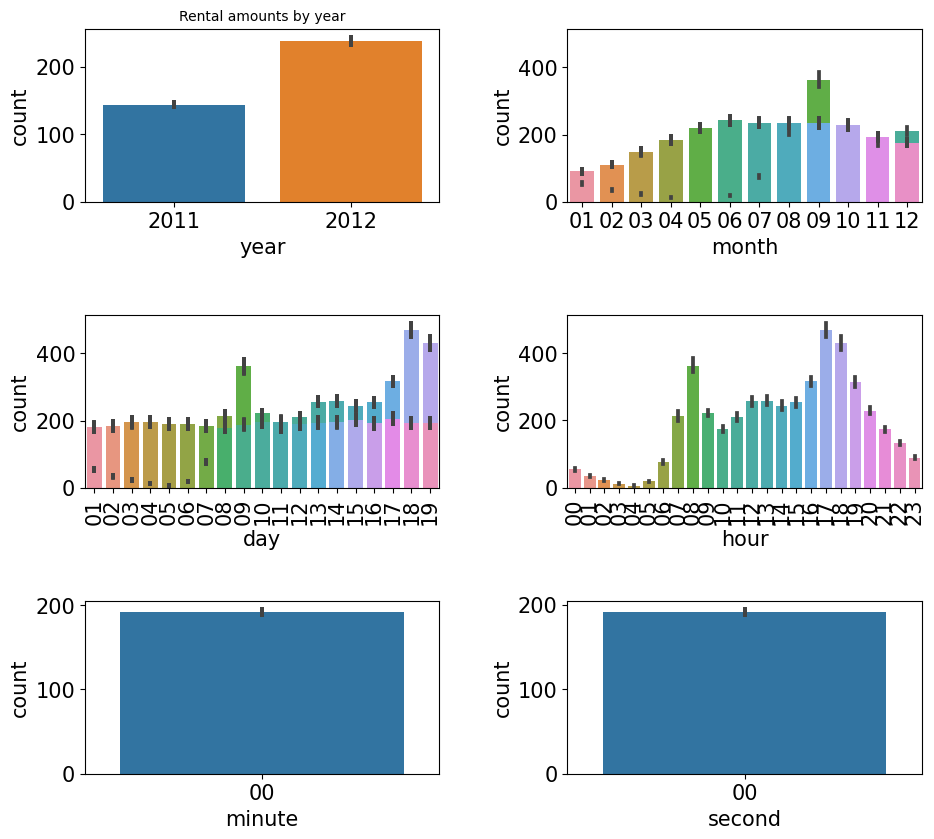

In [42]:
axes[1,0].tick_params(axis = 'x', labelrotation = 90)
axes[1,1].tick_params(axis = 'x', labelrotation = 90)

figure